In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras

2024-05-14 04:11:41.757062: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Class labels

In [2]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [3]:
data_dir = 'Desktop/pandas-demo/Portfolio-Projects/traffic-sign-recognition-system'
train_path = 'Train'
test_path = 'Test'

In [4]:
import os

In [5]:
number_of_classes = len(os.listdir(train_path))
classes = os.listdir(train_path)
classes.remove('.DS_Store')

In [6]:
classes
number_of_classes = len(classes)
number_of_classes

43

In [7]:
classes

['32',
 '35',
 '34',
 '33',
 '20',
 '18',
 '27',
 '9',
 '0',
 '11',
 '7',
 '29',
 '16',
 '42',
 '6',
 '28',
 '17',
 '1',
 '10',
 '19',
 '26',
 '8',
 '21',
 '38',
 '36',
 '31',
 '30',
 '37',
 '39',
 '41',
 '24',
 '23',
 '4',
 '15',
 '3',
 '12',
 '40',
 '2',
 '13',
 '5',
 '14',
 '22',
 '25']

Visualizations

In [8]:
folders = classes
class_ = []
label = []

for folder in folders:
    class_.append(folder)
    label.append(len(os.listdir(f'Train/{folder}')))

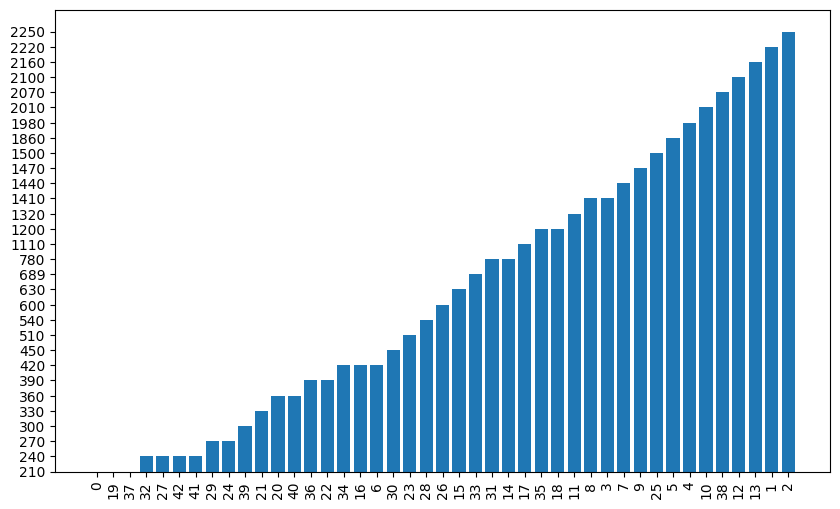

In [9]:

sorted_classes_quant = np.array(sorted(zip(class_, label), key = lambda x:x[1]))



plt.figure(figsize=(10,6))
plt.bar((sorted_classes_quant[:,0]), sorted_classes_quant[:,1])
plt.xticks(rotation='vertical')
plt.show()

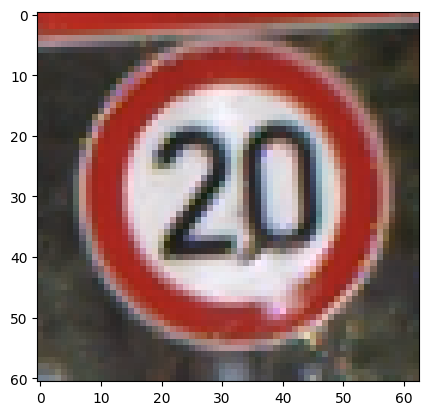

In [10]:
rand_image = plt.imread('Train/0/00000_00000_00022.png')
plt.imshow(rand_image, cmap='binary', interpolation='nearest')
plt.show()

Visualizing random Test images

In [11]:
test = pd.read_csv('Test.csv')
test_imgs = list(test.Path.values)

In [12]:
import random

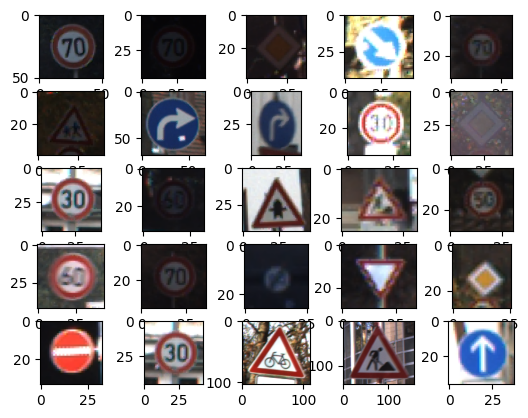

In [13]:
for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path =  random.choice(test_imgs)
    rand_img = plt.imread(random_img_path)
    plt.imshow(rand_img)

In [14]:
from PIL import Image

In [15]:
imgs = []
img_label = []

for folder in folders:
    for img_ in os.listdir(f'Train/{folder}'):
        im = Image.open(f'Train/{folder}/{img_}')
        imgs.append(np.array(im.resize((30,30))))
        img_label.append(folder)
        
    
    

In [16]:
img_data = np.array(imgs)
img_labels = np.array(img_label)

In [17]:
img_data.shape, img_labels.shape

((39209, 30, 30, 3), (39209,))

Shuffling data

In [18]:
from sklearn.utils import shuffle

In [19]:
X, y = shuffle(img_data, img_labels, random_state=42)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, stratify=y,
                                                  random_state=42)

In [22]:
X_train.shape, X_val.shape , y_train.shape, y_val.shape

((35288, 30, 30, 3), (3921, 30, 30, 3), (35288,), (3921,))

In [23]:
X_train = X_train / 255
X_val = X_val / 255

In [24]:
y_train.shape, y_val.shape

((35288,), (3921,))

#### BULDING THE MODEL

In [51]:
model__= keras.models.Sequential([
    keras.layers.Flatten(input_shape=[30,30,3]),    
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(43, activation = 'softmax')
])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
earlystop_cb = keras.callbacks.EarlyStopping(patience = 5)

In [53]:
model__.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam',
              metrics = ['accuracy'])
          

In [54]:
y_train = y_train.astype(int)
y_val = y_val.astype(int)

In [ ]:
history = model__.fit(X_train, y_train, epochs = 20, callbacks = [earlystop_cb],
          validation_data=(X_val, y_val))

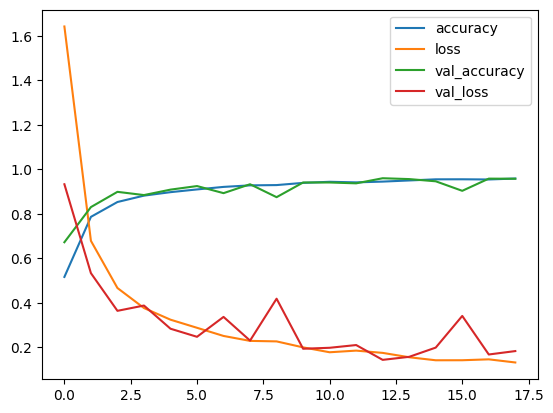

In [48]:
(pd.DataFrame(history.history)).plot(kind='line')
plt.show()


The model is giving accuracy of 96% on training set and accuracy of 95% of Validation set 

#### Evaluating the Model of Test Data

In [33]:
test = pd.read_csv('test.csv')

In [34]:
labels_test = test.ClassId.values
imgs_test = test.Path.values

In [35]:
labels_test[:5], imgs_test[:5]

(array([16,  1, 38, 33, 11]),
 array(['Test/00000.png', 'Test/00001.png', 'Test/00002.png',
        'Test/00003.png', 'Test/00004.png'], dtype=object))

In [36]:
imgs_data_test = []

for img in imgs_test:
    im = Image.open(img)
    im = im.resize((30,30))
    imgs_data_test.append(np.array(im))

In [37]:
X_test = np.array(imgs_data_test)
X_test = X_test /255

In [38]:
y_test = labels_test

In [39]:
X_test.shape, y_test.shape

((12630, 30, 30, 3), (12630,))

In [49]:
model_.evaluate(X_test, y_test)

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8306 - loss: 0.9666


[0.987731397151947, 0.832937479019165]

#### The Neural network did not give satisfactory result. Lets try CNN

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [57]:
model_cnn = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(30,30,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam

In [60]:

model_cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam',
              metrics = ['accuracy'])
          

In [61]:
history_cnn = model_cnn.fit(X_train, y_train, epochs=30, 
                       validation_data=(X_val, y_val),
                      callbacks=[earlystop_cb])

Epoch 1/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 96s 83ms/step - accuracy: 0.7639 - loss: 0.9738 - val_accuracy: 0.9783 - val_loss: 0.0766
Epoch 2/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 99s 90ms/step - accuracy: 0.9856 - loss: 0.0479 - val_accuracy: 0.9923 - val_loss: 0.0273
Epoch 3/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 92s 83ms/step - accuracy: 0.9925 - loss: 0.0270 - val_accuracy: 0.9916 - val_loss: 0.0252
Epoch 4/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 93s 84ms/step - accuracy: 0.9910 - loss: 0.0292 - val_accuracy: 0.9906 - val_loss: 0.0377
Epoch 5/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 95s 87ms/step - accuracy: 0.9929 - loss: 0.0220 - val_accuracy: 0.9964 - val_loss: 0.0129
Epoch 6/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 95s 86ms/step - accuracy: 0.9942 - loss: 0.0172 - val_accuracy: 0.9918 - val_loss: 0.0277
Epoch 7/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 94s 85ms/step - accuracy: 0.9932 - loss: 0.0181 - val_accuracy: 0.9952 - val_loss: 0.0227
Epoch 8/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 95s 86ms/step - accuracy: 0.9948 -

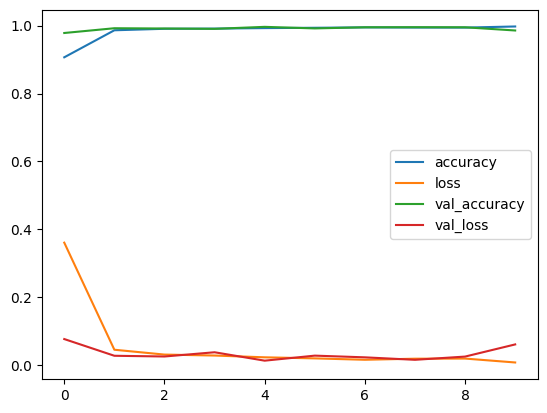

In [63]:
(pd.DataFrame(history_cnn.history)).plot(kind='line')
plt.show()

In [64]:
model_cnn.evaluate(X_test, y_test)

395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9645 - loss: 0.1397


[0.1457265466451645, 0.964845597743988]

### The CNN has a 96% accuracy on test set

In [71]:
predict_probs=model_cnn.predict(X_test) 
y_pred=np.argmax(predict_probs,axis=1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step


In [72]:
from sklearn.metrics import confusion_matrix

In [74]:
cf_cnn = confusion_matrix(y_test, y_pred)
cf_cnn

array([[ 60,   0,   0, ...,   0,   0,   0],
       [  0, 715,   3, ...,   0,   0,   0],
       [  0,   3, 746, ...,   0,   0,   0],
       ...,
       [  0,   2,   0, ...,  80,   0,   0],
       [  0,   0,   0, ...,   0,  54,   0],
       [  0,   0,   0, ...,   0,   0,  88]])

In [81]:
import seaborn as sns

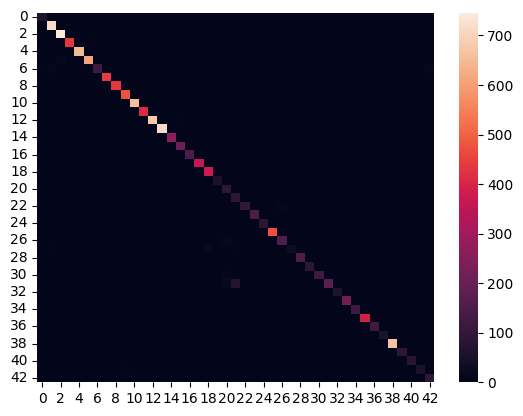

In [82]:
sns.heatmap(cf_cnn)
plt.show()

Some Random Images From Test Set and their prediction

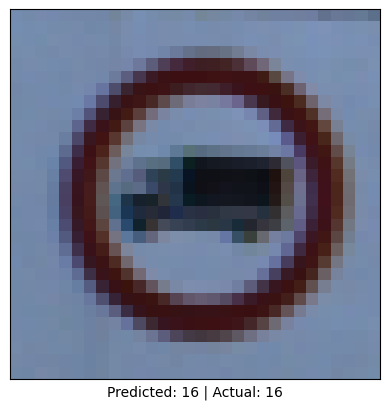

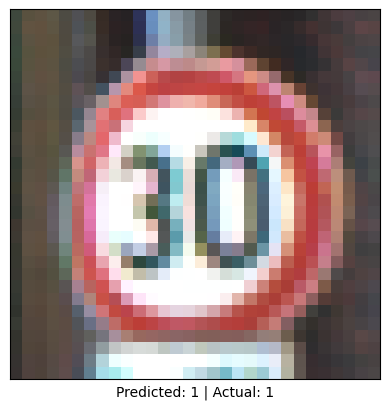

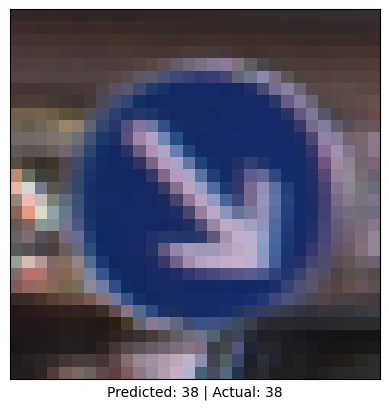

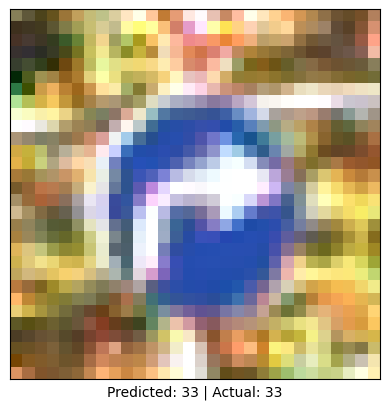

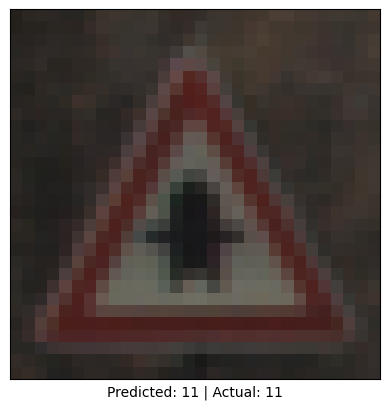

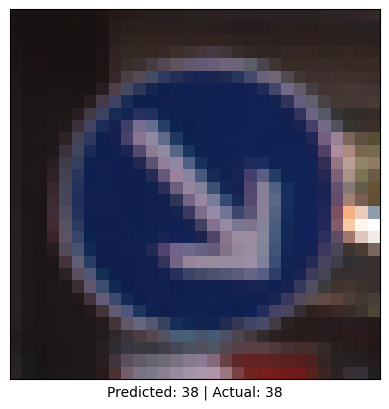

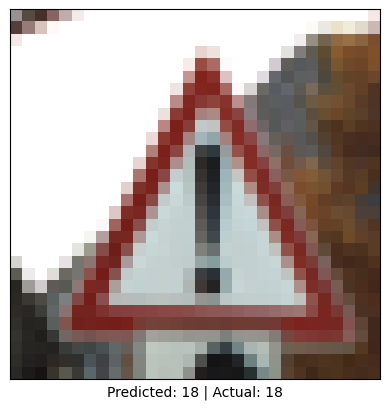

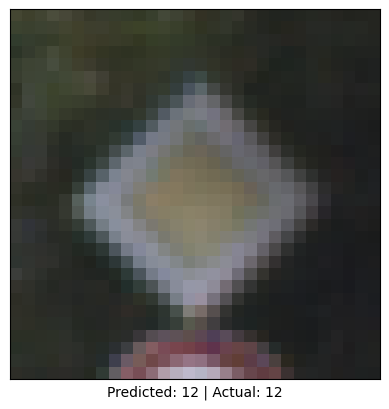

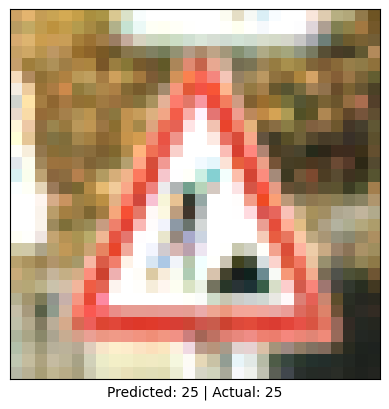

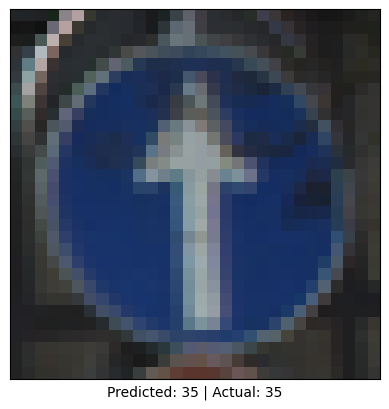

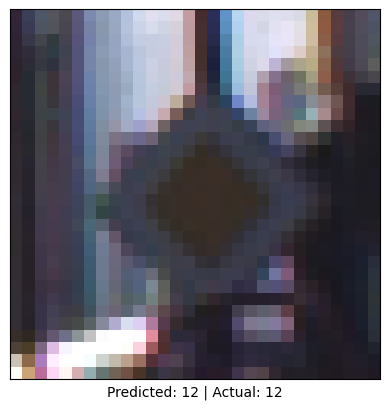

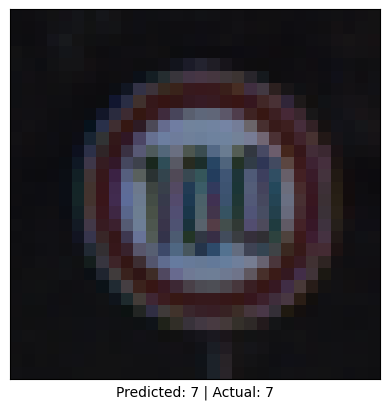

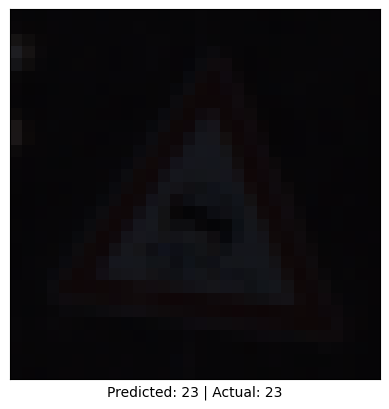

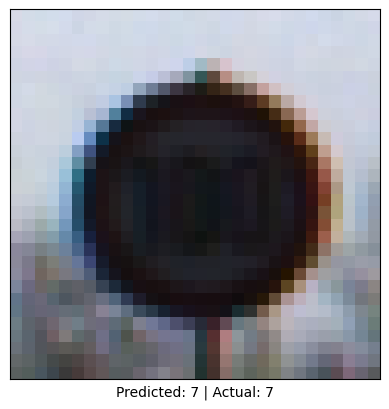

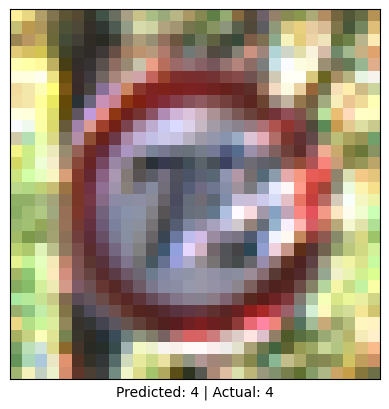

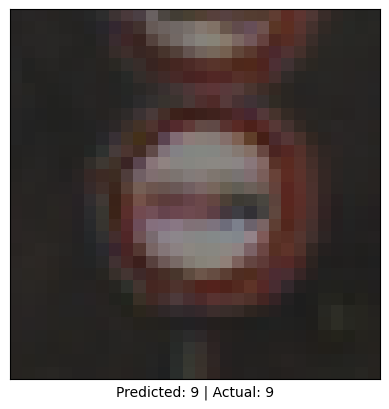

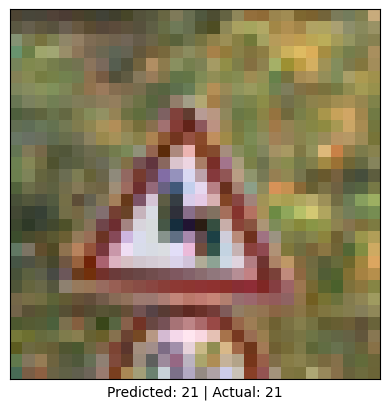

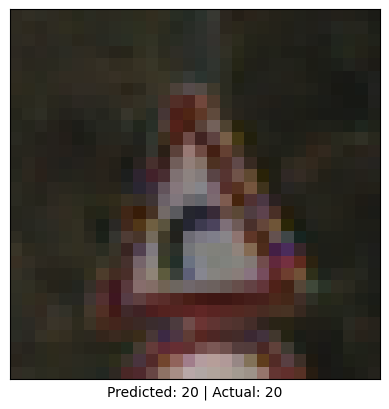

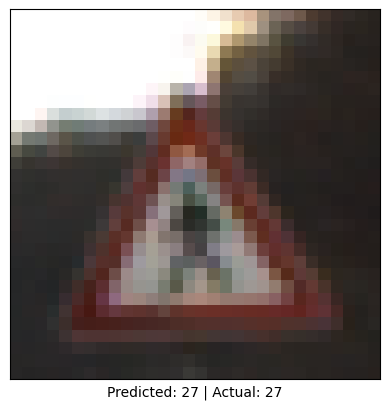

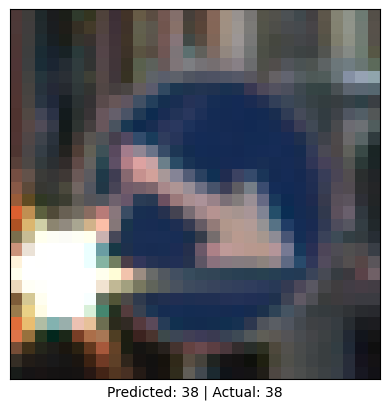

In [91]:
for i in range(20):
    actual = y_test[i]
    prediction = y_pred[i]
    plt.imshow(X_test[i])
    plt.xlabel(f'Predicted: {prediction} | Actual: {actual}')
    plt.xticks([])
    plt.yticks([])
    plt.show()